## Music & Mental Health: How does it affect us? 

### Introduction

Music has long been known to improve mental health and various clinical and non-clinical investigations have concluded the positive affect of music engagement on a better quality of life. This also includes reduced levels of depression and anxiety. Different music genres have been known to have a strong link with cognitive benefits and various personality traits. In particular, different kinds of music genre are known to have different kinds of effects on the human mind. While many studies exist with respect to music genres and mental health, there is limited understanding regarding the direct and indirect effect of the same on traits such as depression, anxiety and insomnia.  

A research article by the National Library of Medicine identified four different types of genres (grunge rock, classical, New Age, and designer), and found significant increases in levels of sadness, relaxation, mental clarity and more among people who listen to the same for more than 15 minutes. Inspired by this study, we want to use two music genres given in our **Music and Mental Health** dataset: Rock and Pop, and carry out a statistical inference about their effects on three factors: anxiety, depression, insomnia. 

#### We aim to answer this inferential question:

**Does the type of music genre have a significant effect on the levels of anxiety, depression and insomnia on a population?**

**Parameters:**

Location Parameter: Mean 

Scale Parameter: Standard Deviation




**Methods: Plan**

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, **in what ways is this report trustworthy?**

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans **include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.**

Finish this section by reflecting on how your final report might play out:

**What do you expect to find?
What impact could such findings have?
What future questions could this lead to?**

**References**

1. McCraty R, Barrios-Choplin B, Atkinson M, Tomasino D. The effects of different types of music on mood, tension, and mental clarity. Altern Ther Health Med. 1998 Jan;4(1):75-84. PMID: 9439023.

2. Gustavson, D.E., Coleman, P.L., Iversen, J.R. et al. Mental health and music engagement: review, framework, and guidelines for future studies. Transl Psychiatry 11, 370 (2021). https://doi.org/10.1038/s41398-021-01483-8 

3. Kaggle Dataset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results


**At least two citations of literature relevant to the project**. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

assigned to review a different group’s proposal. This allows your group to collectively see a larger variety of proposals.)

submit that to canvas. There is no page limit. The teaching team will deliver the feedback to your reviewee.)

communicated effectively. When possible, provide suggestions for improvement. If everything looks good to you, say why it looks good.) comment: <> (- What part of the proposal is the most effective, and why?) comment: <> (- What part of the proposal is the least effective, and why? Provide a suggestion for improvement.) comment: <> (- Provide feedback on English, spelling, and grammar, if applicable.)

the composition of your submission, reasoning (70%) evaluates your feedback, and writing (20%) evaluates your English, spelling, and grammar.)

**Jason: here is an useful website!!!**

**https://www.citationmachine.net/**


In [35]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)
library(dplyr)


In [36]:
mxmh_survey_results <- read_csv("https://raw.githubusercontent.com/SaiUbc/STAT-201-Group-Project-Team-3/Jason/mxmh_survey_results.csv")

head(mxmh_survey_results)

Rows: 736 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): Timestamp, Primary streaming service, While working, Instrumentali...
dbl  (7): Age, Hours per day, BPM, Anxiety, Depression, Insomnia, OCD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,⋯,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,NA,I understand.
8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,NA,I understand.
8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


In [40]:
mxmh_survey_results <- mxmh_survey_results %>%
                       rename(genre="Fav genre")

head(mxmh_survey_results)

Fav_Genre,n()
<chr>,<int>
Classical,53
Country,25
EDM,37
Folk,30
Gospel,6
Hip hop,35
Jazz,20
K pop,26
Latin,3


In [5]:
all_of_fav_genre <- mxmh_survey_results %>%
                    group_by(genre) %>%
                    summarise(n())
all_of_fav_genre


Fav genre,Anxiety,Depression,Insomnia
<chr>,<dbl>,<dbl>,<dbl>
Latin,3,0,1
Rock,7,2,2
Video game music,7,7,10
Jazz,9,7,3
R&B,7,2,5
Jazz,8,8,7


In [93]:
mxmh_survey_results_filtered <- mxmh_survey_results %>%
                                select(genre, Anxiety, Depression, Insomnia)
head(mxmh_survey_results_filtered)

genre,Anxiety,Depression,Insomnia
<chr>,<dbl>,<dbl>,<dbl>
Latin,3,0,1
Rock,7,2,2
Video game music,7,7,10
Jazz,9,7,3
R&B,7,2,5
Jazz,8,8,7


In [94]:
rock <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock")
rock_anxi <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(Anxiety)
rock_depr <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(Depression)
rock_inso <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(Insomnia)

head(rock)

genre,Anxiety,Depression,Insomnia
<chr>,<dbl>,<dbl>,<dbl>
Rock,7,2,2
Rock,2,0,0
Rock,10,6,8
Rock,8,6,10
Rock,7,7,2
Rock,5,6,6


In [95]:
rock_anxi_mean <- rock %>%
                  select(Anxiety) %>%
                  summarise(anxi_mean = mean(Anxiety)) %>%
                  as.numeric()

rock_depr_mean <- rock %>%
                  select(Depression) %>%
                  summarise(depr_mean = mean(Depression)) %>%
                  as.numeric()

rock_inso_mean <- rock %>%
                  select(Insomnia) %>%
                  summarise(depr_mean = mean(Insomnia)) %>%
                  as.numeric()

rock_anxi_mean
rock_depr_mean
rock_inso_mean

[1] 6.12234

[1] 5.236702

[1] 3.880319

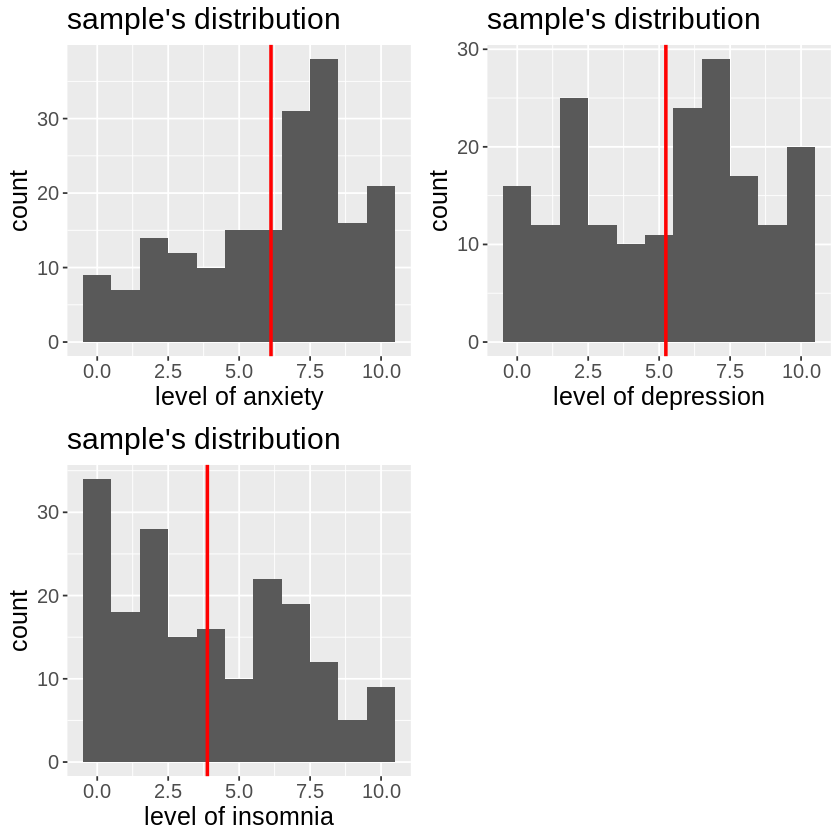

In [96]:
rock_anxi_sample <- rock_anxi %>%
               ggplot() +
               geom_histogram(aes(x=Anxiety), binwidth=1) +
               geom_vline(xintercept=rock_anxi_mean, colour="red", size=1) +
               xlab("level of anxiety") +
               ggtitle("sample's distribution")
rock_depr_sample <- rock_depr %>%
               ggplot() +
               geom_histogram(aes(x=Depression), binwidth=1) +
               geom_vline(xintercept=rock_depr_mean, colour="red", size=1) +
               xlab("level of depression") +
               ggtitle("sample's distribution")
rock_inso_sample <- rock_inso %>%
               ggplot() +
               geom_histogram(aes(x=Insomnia), binwidth=1) +
               geom_vline(xintercept=rock_inso_mean, colour="red", size=1) +
               xlab("level of insomnia") +
               ggtitle("sample's distribution")

rock_plot <- plot_grid(rock_anxi_sample + theme(text = element_text(size=15)),
                           rock_depr_sample + theme(text = element_text(size=15)),
                           rock_inso_sample + theme(text = element_text(size=15)),
                           ncol = 2)
rock_plot